# Udacity Data Scientist Nanodegree: Project 1

This first project of the Udacity Data Scientist Nanodegree program involves taking the concepts we learned using CRISP-DM analysis and applying them to a real set of data to answer some questions about our findings. 

## As per the CRISP-DM or Cross-Industry Standard Process for Data Mining process, I followed these 6 steps:

### Step 1: Business Understanding
I chose the New York Real Estate market because I have lived in New York before and have a personal understanding of the way the real estate market works. Typically people not familiar with New York City know more about the borough of Manhattan from movies and TV, but have very little knowledge of the surrounding boroughs.

As I looked over the available data on Kaggle.com the subject of New York City real estate drew my attention.

### Step 2: Data Understanding and Step 3: Data Preparation
In order to understand the dataset I was analyzing I needed a bird's eye view of the data or a general overview of what I was looking at without looking at every single row and column on the file.

I found that in trying to understand the data I also had to prepare the data as well. So these two steps ended up being done at the same time.

Let's start by reading in the file with our data and the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv('./nyc-rolling-sales.csv', index_col=0) # If we do not specify index_col=0 we get an unnamed index column
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Take note, if we scroll to the right to see the last 2 columns, SALE PRICE and SALE DATE, notice there are some missing SALE PRICE values. We will have to account for this in our analysis later. Now let's learn more about this data

In [ ]:
df.describe()

In [ ]:
df.shape

Here we see 85,548 records and confirm the 21 column count from above. Let's see how many columns have empty records or not equal to 85,458 rows of data

In [ ]:
df.count()

Hmmm, we know that we saw missing SALES PRICE values so something is not as expected here. Turns out that a hyphen is not seen as NaN by Pandas so we have to replace single hyphen instances with np.nan, but be careful that it's only single hyphens and not for example the case where a hyphen appears within a string like in BUILDING CLASS CATEGORY values such as 07 RENTALS - WALKUP APARTMENTS. This is why we have to use a Regular Expression to do this. So now let's fix this using a Pandas replace function with Regex.

In [2]:
df_new = df.replace(to_replace=r'^\s*[-]\s*', value=np.nan, regex=True)
df_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We make sure that BUILDING CLASS CATEGORY still has values like 07 RENTALS - WALKUP APARTMENTS and not NaN and that the 2nd and 3d SALES PRICE values now read NaN. After we confirm this we then run the count function to see that we do in fact have some values not set, mainly LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE. But let's not be too quick to drop data or rows for these columns just yet. Based on the question we can still consider certain rows where these values are *not* set.

In [ ]:
df_new.count()

Now for a heatmap to see if we can discover any correlations across our data that maybe was not immediately apparent and potentially adjust our questions accordingly. NOTE: when we first attempted to run this we received an error: ValueError: zero-size array to reduction operation minimum which has no identity. This made us realize we have an index column on our file which has no name and Pandas is interpreting as an empty column, in hindsight we saw above that this is the "Unamed" column. So we went back and updated the way we read the csv by specifying index_col=0. However, the problem is there are some empty or NaN values. We can ignore this for now since we may need values from those rows for later. Thanks to user mgilson for a solution that simply ignores this exception for now: https://stackoverflow.com/a/22903196/2788414

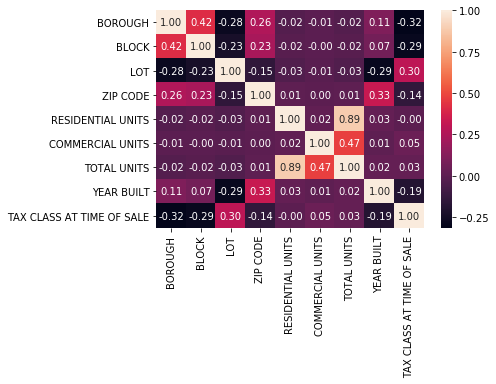

In [3]:
import seaborn as sns
try:
    sns.heatmap(df_new.corr(), annot=True, fmt=".2f");
except ValueError:  #raised if `y` is empty.
    pass
# Year Built has the strongest correlation with Bourough at 0.11 (Zip Code and Lot are not significant since location)
# Year Built also correlates strongly to Zip Code but this is equivalent to Location/Borough
# Total Units and Residential Units are strongly correlated at 0.89, with Commercial Units at 0.47 (come back to this)
# Strong correlations between Borough-Block 0.42 and Zip Code-Borough-Block are not surprising as they all are location

But wait, it seems we are not seeing SALE PRICE above, which is kind of important for our analysis. We can still take away that Year Built and location correlate strongly (Borough 0.11 and Zip Code 0.26). But now let's impute values for LAND SQUARE FEET, GROSS SQUARE FEET, and SALE PRICE then try again using the mode for these values.

In [3]:
fill_mode = lambda col: col.fillna(col.mode()[0])

try:
    df_clean = df_new.apply(fill_mode, axis=0)
except:
    print('That broke...')
df_clean.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can try our heatmap again, but this time no need to ignore ValueError since now we have imputed values and no more NaN. But when ran the heatmap a second time we still did not see SALES PRICE. At first we thought the column BUILDING CLASS AT TIME OF SALE, a categorical column (C2, C7, C4, etc. values), was causing heatmap to stop at BUILDING CLASS AT TIME OF SALE. Quick fix would have been to drop this column, but let's not in case we can glean something off this value. Instead let us encode this column into a numerical value we can correlate using the sklearn.preprocessing library. In addition let's drop BLOCK, LOT, and ZIP CODE because they are already tied to Location which is already represented by BOROUGH and NEIGHBORHOOD for our analysis.

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_clean['BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(df_clean['BUILDING CLASS AT TIME OF SALE'])
# BLOCK, LOT, and ZIP CODE are location based and already represented as Location by BOROUGH and NEIGHBORHOOD
# So let's drop them to cut down the noise and see the heat map better so instead of 9 numeric columns we see 8
df_clean.drop(columns=['BLOCK', 'LOT', 'ZIP CODE'], inplace=True)
#originally 9, expecting 7 after we encode BUILDING CLASS AT TIME OF SALE and drop the 3 columns, net - 2
len(df_clean.select_dtypes("number").columns)

7

We see the 7 numeric (int64) columns, but still no SALES PRICE. So we run the code below to see the types and what do we see?

In [ ]:
df_clean.dtypes

Notice that there are some columns that are object and not numeric (int64), mainly SALE PRICE but also LAND SQUARE FEET and GROSS SQUARE FEET. So let's fix those with the following code (thanks to kite.com for the tip on using astype: https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python). And while we are doing this let's also convert our SALE DATE into a numeric that we can perhaps also use in our correlation as a Year Month Day format (thanks to StackOverflow for this trick: https://stackoverflow.com/questions/51544078/how-to-convert-int64-to-datetime-in-pandas and https://stackoverflow.com/questions/46834732/convert-pandas-datetime-column-yyyy-mm-dd-to-yyyymmdd).

One other thing we want to do is since our 3rd question relates to season of the year (Winter, Spring, Summer, Fall) let's add two season columns that maps to these times of year based on SALE DATE, one numeric one SALE SEASON NUMBER and another string name SALE SEASON NAME.

In [5]:
df_clean["LAND SQUARE FEET"] = df_clean["LAND SQUARE FEET"].astype(str).astype(int)
df_clean["GROSS SQUARE FEET"] = df_clean["GROSS SQUARE FEET"].astype(str).astype(int)
df_clean["SALE PRICE"] = df_clean["SALE PRICE"].astype(str).astype(int)
df_clean['SALE DATE'] = pd.to_datetime(df_clean['SALE DATE'].astype(str), format='%Y-%m-%d').astype(str).str.replace('-','').astype(int)
# New column to analyze by season of the year
df_clean['SALE SEASON MONTH'] = df_clean['SALE DATE'].astype(str).str[4:6].astype(int)
df_clean['SALE SEASON NUMBER'] = df_clean['SALE SEASON MONTH'].map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})
df_clean['SALE SEASON NAME'] = df_clean['SALE SEASON NUMBER'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
# Drop SALE SEASON MONTH just a temp value
df_clean.drop(columns=['SALE SEASON MONTH'], inplace=True)
df_clean.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   int64
GROSS SQUARE FEET                  int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE     int64
SALE PRICE                         int64
SALE DATE                          int64
SALE SEASON NUMBER                 int64
SALE SEASON NAME                  object
dtype: object

So now we have 12 numeric columns if we include LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE, SALE DATE, and SALE SEASON NUMBER. Let us try the heatmap again. Note: with 12 numeric values the default size is too small and our numbers are crowded so we learned to increase the heatmap resolution from Data Science Stack Exchange user Gilbert at: https://datascience.stackexchange.com/a/17558

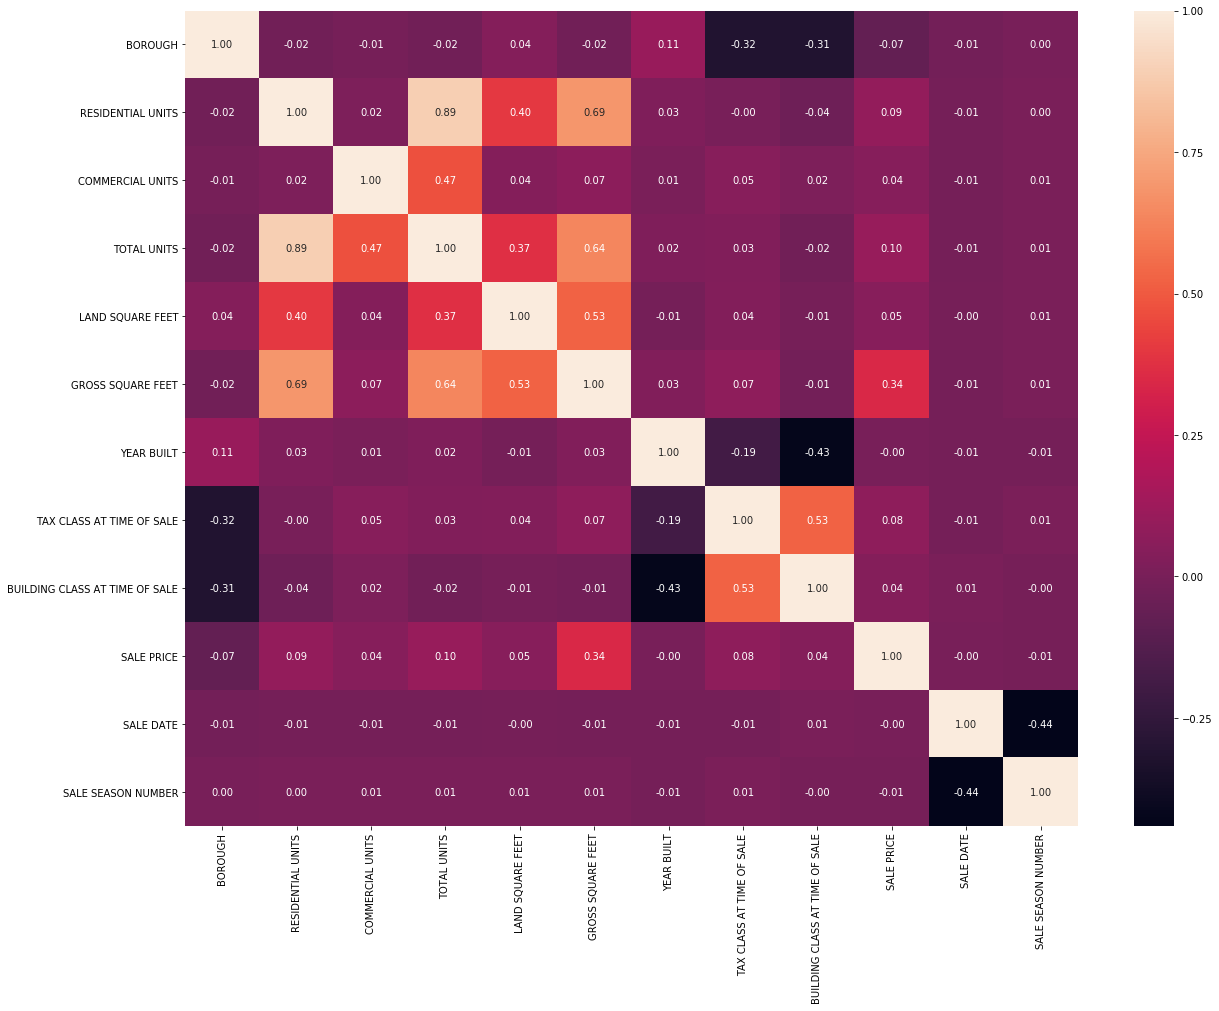

In [7]:
# First increase the heatmap resolution for this many values
plt.subplots(figsize=(20,15))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f");

So no correlation with season of the year. Every column is 0.01 or -0.01, very little correlation with SALE SEASON NUMBER, other than SALE DATE but that is to be expected since one derived the other.

Now let us see which boroughs are selling the most. We know from the neighborhood names (e.g. ALPHABET CITY is in Manhattan, THROGS NECKS is the Bronx, BEDFORD STUYVESANT is in Brooklyn, COLLEGE POINT is in Queens, and WOODROW is in Staten Island) so we will map those to a new column BOROUGH NAME to make this easier to answer our questions.

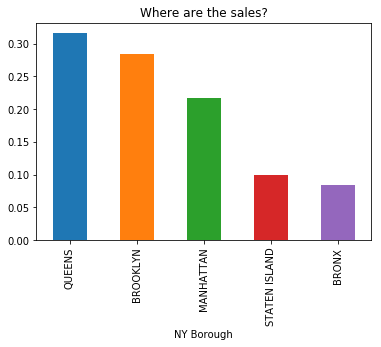

In [6]:
df_clean['BOROUGH NAME'] = df['BOROUGH'].map({1: 'MANHATTAN', 2: 'BRONX', 3: 'BROOKLYN', 4: 'QUEENS', 5: 'STATEN ISLAND'})
status_vals = df_clean['BOROUGH NAME'].value_counts() #Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

b = (status_vals/df_clean.shape[0]).plot(kind="bar");
b.set_xlabel("NY Borough")
plt.title("Where are the sales?");

More than half of all sales in Queens and Brooklyn, but they have more inventory. So not Manhanttan but those boroughs probably do more volume with their higher inventory. And which bourough has the higher priced sales?

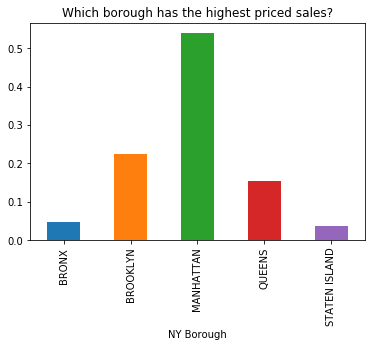

In [24]:
sales_by_borough = df_clean.groupby(['BOROUGH NAME'])['SALE PRICE'].sum()
p = (sales_by_borough/df_clean['SALE PRICE'].sum()).plot(kind="bar");
p.set_xlabel("NY Borough")
plt.title("Which borough has the highest priced sales?");

Here as expected Manhattan has more than 50% of the higher priced properties for sale. Makes sense given supply and demand but we already knew Manhattan real estate would be more in demand.

### Step 4: Modeling

First attempt at our linear model was to take all the numerics that had some degree of correlation and add them as our x input variables, but we were getting negative r-squared values which meant our model was off. We started removing and tweaking inputs and found these input columns are the best predictors for SALE PRICE: BOROUGH, YEAR BUILT, and TAX CLASS AT TIME OF SALE. We also tried including SALE DATE and SALE SEASON NUMBER but that did not make a difference in our resulting r-squared as expected from our analysis above.

In [28]:
#Split into explanatory and response variables
X2 = df_clean[['BOROUGH', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']]
y2 = df_clean['SALE PRICE']

#Split into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train2, y_train2) #Fit
        
#Predict and score the model
y_test_preds2 = lm_model.predict(X_test2) 

#Rsquared and y_test
rsquared_score = r2_score(y_test2, y_test_preds2)#r2_score
length_y_test = len(y_test2)#num in y_test

"The r-squared score for our model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for our model was 0.02388151072582434 on 25365 values.'

### Step 5: Evaluation

If we remove BOROUGH from our model then our r-square drops from 0.023 to 0.015 so we can answer question 1:

| # | Question | Results |
| :--- | :--- | :--- |
| 1 | Does Manhattan or the borough in general have any effect in predicting the sales price of a property? | **YES** it impacts the price by a 35% difference in r-square value. Although Queens and Brooklyn have more sales (more than 50% of the sales together), Manhattan has the higher priced sales (over 50% as seen in our bar graph above). |
| 2 | Are older buildings selling better than newer buildings based on location, given that most older buildings are rent controlled in New York? | **NO** not really, the impact is only about a 4% difference in r-square value. This was a little surprising given the older buildings are typically rent-controlled. |

Regarding question 2, if we remove YEAR BUILT from our model the r-square does drop from 0.023 down to 0.022. This is how we derived our answer.

The results of question 2 made us pause to go back and see what the distribution of YEAR BUILT was in our data. Maybe we were looking at newer buildings so rent control was not a factor. But in fact a call to value_counts() reveals this is not the case. We are in fact looking at data that covers buildings going mostly back before WWII. So again, we confirm that year built has no correlation with properties selling better.

In [23]:
df_clean['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
1960    2654
1940    2456
1931    2246
1955    1961
1899    1798
1901    1755
1935    1610
1965    1511
2015    1470
1945    1330
2014    1232
2007    1186
1915    1182
1900    1130
2005    1106
1970     952
1963     941
2008     935
2006     924
1962     839
2016     794
2013     743
1961     728
2004     715
        ... 
1894       5
1892       4
1845       4
1871       3
1852       3
1891       3
1854       3
1898       3
1875       3
1844       2
1865       2
1893       2
1889       2
1846       2
1856       2
1883       2
1851       2
1847       2
1882       2
1835       2
1840       2
1864       2
1680       1
1855       1
1826       1
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

| # | Question | Results |
| :--- | :--- | :--- |
| 3 | Is there a correlation in sales with time of year and square footage for any particular borough? For example, are Manhattan apartments selling faster in the winter or are lofts in Brooklyn in higher demand during the summer months? | **NO** none at all in fact. Neither SALE DATE nor SALE SEASON NUMBER made any difference in our r-square value model. |

### Step 6: Deployment

#### This Jupyter Notebook has been added to our GitHub project at https://github.com/hmelendez001/Project1-Udacity-Data-Scientist. 
    
#### An explanation of our model and findings can also be found at our blog: https://hmelendez001.github.io/2021/10/15/Udacity-Data-Scientist-Nanodegree-Project-1.html